 MACHINE LEARNING PROJECT 

 TOPIC :**Simple Linear Regression**
***



We will estimate a student's expected percentage of marks in this regression task depending on the number of hours they spent studying. Given that there are just two variables, this is a simple linear regression task.

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

**Loading the Dataset**

In [ ]:
#importing data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

lr = pd.read_csv(url)

print("Data imported Successfully")

print(lr.head(10))

Data imported Successfully
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


In [ ]:
# Check if there any null value in the Data
lr.isnull == True

False

**There is no null value in the Dataset so, we can now visualize our Data.**

In [ ]:
#Summarizing the data
lr.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the Dataset to visualize The Dataset**

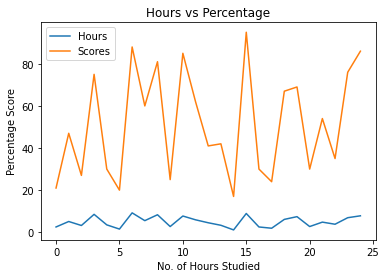

In [ ]:
# Visualising the data using line plot
lr.plot(kind="line" )
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

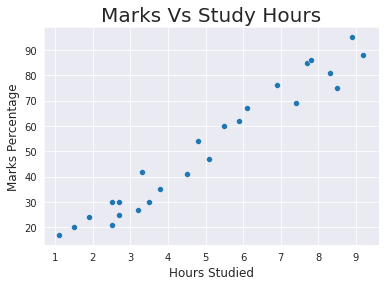

In [ ]:
#plotting the scatter plot
sns.set_style('darkgrid')
sns.scatterplot(y= lr['Scores'], x= lr['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

Let's construct a regression line to validate the association between the "Marks Percentage" and the "Hours Studied," which appears to be correlated in the scatter plot above.

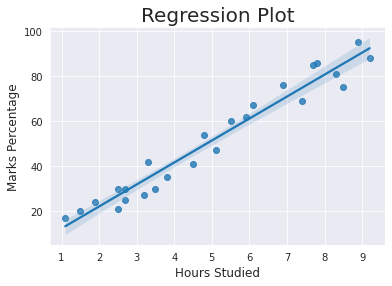

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
#Plotting the regression plot
sns.regplot(x= lr['Hours'], y= lr['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
#Correlation matrix
print(lr.corr())

The correlation between the variables is confirmed to be positive.


***Preparing Data***

Splitting the Data

The next task is to categorize the data into "attributes" (inputs) and "labels" (outputs)

In [ ]:
# Defining X and Y from the Data
X = lr.iloc[:, :-1].values  
Y = lr.iloc[:, 1].values

In [ ]:
# Spliting the Data in two
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 0)

# **Training the Model Using Linear Regression**

---


After separating our data into training and testing sets, it's finally time to train our algorithm.

 Fitting the Data into the model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X, train_Y)

print("Model Training completed")

Model Training completed


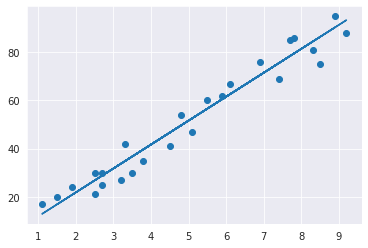

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

**Making predictions**

Making predictions is now possible because our algorithm has been trained.

In [ ]:
# Testing data - In Hours
print(train_X)   

[[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [ ]:
# Predicting the scores
y_pred = regressor.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in y_pred]})
prediction
print(prediction)

   Hours  Predicted Marks
0    1.5        16.844722
1    3.2        33.745575
2    7.4        75.500624
3    2.5        26.786400
4    5.9        60.588106
5    3.8        39.710582
6    1.9        20.821393


In [ ]:
# Comparing Actual vs Predicted
comparison = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': y_pred})
print(comparison)

   Actual Marks  Predicted Marks
0            20        16.844722
1            27        33.745575
2            69        75.500624
3            30        26.786400
4            62        60.588106
5            35        39.710582
6            24        20.821393


**Visual Comparison of the Predicted Marks with the Actual Marks**

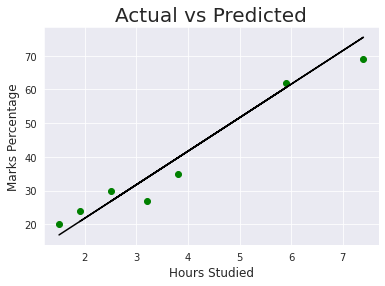

In [ ]:
plt.scatter(x=val_X, y=val_Y, color='Green')
plt.plot(val_X, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Evaluating the model**

The final step is to assess the algorithm's performance. This step is essential for assessing how well different algorithms perform on a particular dataset. For the sake of simplicity, we've opted to use the mean square error in this case. Such metrics are numerous # from sklearn import metrics

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(val_Y,y_pred))

Mean Absolute Error: 4.130879918502482


**A low mean absolute error indicates that there is relatively little probability for the model to forecast incorrectly.**

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [ ]:


hours = 9.25
# reshaping the data 
hours = np.array(hours).reshape(-1,1)

own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341652


**The regression model predicts that a student who studies for 9.25 hours each day would most likely receive a grade of 93.89.**